In [1]:
import pandas as pd
import numpy as np
from accuracy_analysis import df, audio_df,mute_df
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind, ttest_rel


Index(['L1', 'L11', 'L13', 'L14', 'L15', 'L2', 'L3', 'L7', 'T10', 'T12', 'T16',
       'T4', 'T5', 'T6', 'T8', 'T9'],
      dtype='object')
[2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]
47.291666666666664
13.503205770925439
51.333333333333336
16.291172420994588
12
18
12
18
Ttest_indResult(statistic=0.31525272569414475, pvalue=0.7549073765745931)
Ttest_indResult(statistic=-0.3055993816873792, pvalue=0.7621701770223024)
Index(['Participant', 'L1', 'L2', 'L3', 'T4', 'T5', 'T6', 'L7', 'T8', 'Gender',
       'actual_acc', 'actual_acc_percent', 'label'],
      dtype='object')
30
Mean 47.5
Std 19.737865470545017
30
Mean 47.083333333333336
Std 20.073649117409843


## Fixation summary

In [2]:
fixation_summary = pd.read_csv("fixation-duration-summary.txt",sep="\t", na_values='-')

In [3]:
fixation_summary = fixation_summary.drop([0,1]).reset_index(drop=True)
fixation_summary = fixation_summary.rename(columns={"Unnamed: 0":"Participant"})

In [4]:
# fixation_summary 

In [5]:
df = df.reset_index(drop=True)

In [6]:
fixation_summary["actual_acc_percent"]= df['actual_acc_percent']

In [7]:
fixation_summary = fixation_summary.drop([30]).reset_index(drop=True)

In [8]:
fixation_summary = fixation_summary.fillna(fixation_summary.mean())

In [9]:
st = np.std(fixation_summary['Fixation Duration_All Media_eyes_N'])

In [10]:
print(np.mean(fixation_summary['Fixation Duration_All Media_eyes_N']))
print(np.mean(fixation_summary['Fixation Duration_All Media_eyes_N']) - 3*st)
print(np.mean(fixation_summary['Fixation Duration_All Media_eyes_N']) + 3*st)


228.1
-330.3140130763196
786.5140130763197


In [11]:
fixation_summary

,Participant,Fixation Duration_All Media_eyes_N,Fixation Duration_All Media_eyes_Mean,Fixation Duration_All Media_eyes_Sum,Fixation Duration_All Media_eyes_Stdev,Fixation Duration_All Media_mouth_N,Fixation Duration_All Media_mouth_Mean,Fixation Duration_All Media_mouth_Sum,Fixation Duration_All Media_mouth_Stdev,actual_acc_percent
0,Mengran,125,0.32,39.58,0.30,82.000000,0.390000,31.87,0.320000,56.25
1,P03,260,1.83,476.84,2.09,161.034483,0.564828,96.02,0.608276,37.50
2,P04,136,0.46,62.16,0.33,205.000000,0.630000,130.17,0.680000,50.00
3,P05,672,0.59,398.03,0.55,50.000000,0.420000,20.84,0.380000,37.50
4,P06,521,0.67,351.10,0.59,171.000000,0.500000,86.31,0.360000,37.50
5,P07,2,0.05,0.11,0.06,11.000000,0.930000,10.23,1.280000,18.75
6,P08,18,0.35,6.27,0.30,154.000000,1.210000,187.02,1.730000,37.50
7,P09,361,0.66,239.33,0.65,117.000000,0.560000,65.41,0.760000,50.00
8,P10,105,0.48,49.92,0.39,67.000000,0.690000,46.21,0.540000,50.00
9,P11,449,0.37,165.03,0.35,54.000000,0.360000,19.30,0.230000,43.75


In [12]:
mean_acc = np.mean(fixation_summary['actual_acc_percent'])

In [13]:
mean_acc

47.291666666666664

In [14]:
def labeling(row):
    if row['actual_acc_percent'] <= mean_acc:
        return 0
    if row ['actual_acc_percent'] > mean_acc:
        return 1

fixation_summary['label'] =fixation_summary.apply(lambda row: labeling(row), axis=1)

In [15]:
good = fixation_summary[fixation_summary['label']==1]
bad = fixation_summary[fixation_summary['label']==0]

In [16]:
good

,Participant,Fixation Duration_All Media_eyes_N,Fixation Duration_All Media_eyes_Mean,Fixation Duration_All Media_eyes_Sum,Fixation Duration_All Media_eyes_Stdev,Fixation Duration_All Media_mouth_N,Fixation Duration_All Media_mouth_Mean,Fixation Duration_All Media_mouth_Sum,Fixation Duration_All Media_mouth_Stdev,actual_acc_percent,label
0,Mengran,125,0.32,39.58,0.30,82.0,0.39,31.87,0.32,56.25,1
2,P04,136,0.46,62.16,0.33,205.0,0.63,130.17,0.68,50.00,1
7,P09,361,0.66,239.33,0.65,117.0,0.56,65.41,0.76,50.00,1
8,P10,105,0.48,49.92,0.39,67.0,0.69,46.21,0.54,50.00,1
10,P12,63,0.38,24.19,0.34,223.0,0.65,144.29,0.52,56.25,1
11,P13,211,2.05,432.46,2.36,18.0,0.57,10.30,0.60,62.50,1
12,P14,38,0.36,13.83,0.30,547.0,0.59,321.09,0.52,50.00,1
13,P15,134,0.42,56.09,0.44,4.0,0.45,1.82,0.86,75.00,1
16,P18,135,0.44,59.93,0.42,246.0,0.73,178.45,0.83,56.25,1
18,P20,48,0.21,10.19,0.16,286.0,0.40,114.01,0.47,68.75,1


In [17]:
len(good), len(bad)

(14, 16)

In [18]:
good['Fixation Duration_All Media_eyes_Sum'].sum(),good['Fixation Duration_All Media_mouth_Sum'].sum()

(1310.9499999999998, 1689.6399999999999)

In [19]:
1310.95/3000.59, 1689.64/3000.59

(0.4368974101759987, 0.5631025898240013)

In [20]:
bad['Fixation Duration_All Media_eyes_Sum'].sum(),bad['Fixation Duration_All Media_mouth_Sum'].sum()

(3390.09, 1190.96)

In [21]:
3390.09/4581.05, 1190.96/4581.05

(0.7400246668340228, 0.2599753331659772)

In [22]:
good['Fixation Duration_All Media_eyes_N'].sum(), good['Fixation Duration_All Media_mouth_N'].sum()

(1967, 2919.0)

In [23]:
1967/4886,2919/4886

(0.40257879656160456, 0.5974212034383954)

In [24]:
bad['Fixation Duration_All Media_eyes_N'].sum(), bad['Fixation Duration_All Media_mouth_N'].sum()

(4876, 1912.0344827586207)

In [25]:
4876+1912.03,4876/(4876+1912.03), 1912.03/(4876+1912.03)

(6788.03, 0.7183232837804194, 0.2816767162195806)

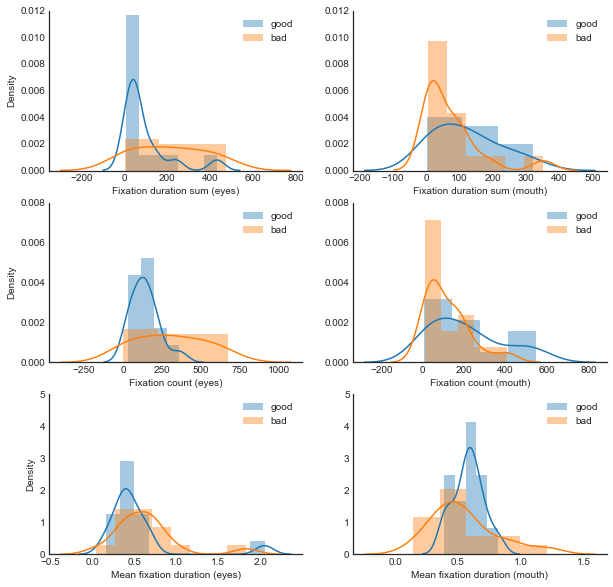

In [26]:
fig, axs = plt.subplots(3,2, figsize=(10,10))
plt.style.use('seaborn-white')


plt.subplot(321)
sns.distplot(good['Fixation Duration_All Media_eyes_Sum'], label="good")
sns.distplot(bad['Fixation Duration_All Media_eyes_Sum'], label="bad")
plt.legend()
plt.ylabel("Density")
plt.xlabel("Fixation duration sum (eyes)")
plt.ylim(0.000,0.012)
sns.despine(left=False, bottom=False)

plt.subplot(322)
sns.distplot(good['Fixation Duration_All Media_mouth_Sum'], label="good")
sns.distplot(bad['Fixation Duration_All Media_mouth_Sum'], label="bad")
plt.xlabel("Fixation duration sum (mouth)")
plt.legend()
plt.ylim(0.000,0.012)
sns.despine(left=False, bottom=False)

plt.subplot(323)
sns.distplot(good['Fixation Duration_All Media_eyes_N'], label="good")
sns.distplot(bad['Fixation Duration_All Media_eyes_N'], label="bad")
plt.legend()
plt.ylabel("Density")
plt.xlabel("Fixation count (eyes)")
plt.ylim(0.000,0.008)
sns.despine(left=False, bottom=False)

plt.subplot(324)
sns.distplot(good['Fixation Duration_All Media_mouth_N'], label="good")
sns.distplot(bad['Fixation Duration_All Media_mouth_N'], label="bad")
plt.legend()
plt.xlabel("Fixation count (mouth)")
plt.ylim(0.000,0.008)
sns.despine(left=False, bottom=False)


plt.subplot(325)
sns.distplot(good['Fixation Duration_All Media_eyes_Mean'], label="good")
sns.distplot(bad['Fixation Duration_All Media_eyes_Mean'], label="bad")
plt.legend()
plt.ylabel("Density")
plt.xlabel("Mean fixation duration (eyes)")
plt.ylim(0.00,5.00)
sns.despine(left=False, bottom=False)


plt.subplot(326)
sns.distplot(good['Fixation Duration_All Media_mouth_Mean'], label="good")
sns.distplot(bad['Fixation Duration_All Media_mouth_Mean'], label="bad")
plt.legend()
plt.xlabel("Mean fixation duration (mouth)")
plt.ylim(0.00,5.00)
sns.despine(left=False, bottom=False)

plt.show()
# plt.savefig("fixation_duration_summary.png", dpi=300)

In [27]:
print('T test for fixation duration sum in eyes')
print(ttest_ind(good['Fixation Duration_All Media_eyes_Sum'], bad['Fixation Duration_All Media_eyes_Sum']))
print("")
print('T test for mean fixation duration in eyes')
print(ttest_ind(good['Fixation Duration_All Media_eyes_Mean'], bad['Fixation Duration_All Media_eyes_Mean']))
print("")
print("T test for fixation duration sum in mouth")
print(ttest_ind(good['Fixation Duration_All Media_mouth_Sum'], bad['Fixation Duration_All Media_mouth_Sum']))
print("")
print('T test for mean fixation duration in mouth')
print(ttest_ind(good['Fixation Duration_All Media_mouth_Mean'], bad['Fixation Duration_All Media_mouth_Mean']))
print("")
print('T test for fixation counts in eyes')
print(ttest_ind(good['Fixation Duration_All Media_eyes_N'], bad['Fixation Duration_All Media_eyes_N']))
print("")
print('T test for fixation counts in mouth')
print(ttest_ind(good['Fixation Duration_All Media_mouth_N'], bad['Fixation Duration_All Media_mouth_N']))

T test for fixation duration sum in eyes
Ttest_indResult(statistic=-2.2356821966462834, pvalue=0.03352502065137729)

T test for mean fixation duration in eyes
Ttest_indResult(statistic=-0.614820811724993, pvalue=0.543637643964404)

T test for fixation duration sum in mouth
Ttest_indResult(statistic=1.3286932580601127, pvalue=0.19467670342678473)

T test for mean fixation duration in mouth
Ttest_indResult(statistic=0.46303074001823064, pvalue=0.646921123099673)

T test for fixation counts in eyes
Ttest_indResult(statistic=-2.594357270846523, pvalue=0.01491113246915141)

T test for fixation counts in mouth
Ttest_indResult(statistic=1.6791472973663881, pvalue=0.10425038891231495)


### Visit Summary

In [28]:
visit_summary = pd.read_csv("visit-duration-summary.txt",sep="\t",na_values='-')

In [29]:
visit_summary = visit_summary.drop([0,1]).reset_index(drop=True)
visit_summary = visit_summary.rename(columns={"Unnamed: 0":"Participant"})

In [30]:
visit_summary["actual_acc_percent"]= df['actual_acc_percent']

In [31]:
visit_summary = visit_summary.fillna(visit_summary.mean())

In [32]:
visit_summary['label'] = fixation_summary['label']

In [33]:
visit_summary = visit_summary.drop(30).reset_index(drop=True)

In [34]:
visit_summary

,Participant,Visit Duration_All Media_eyes_N,Visit Duration_All Media_eyes_Mean,Visit Duration_All Media_eyes_Sum,Visit Duration_All Media_eyes_Stdev,Visit Duration_All Media_mouth_N,Visit Duration_All Media_mouth_Mean,Visit Duration_All Media_mouth_Sum,Visit Duration_All Media_mouth_Stdev,actual_acc_percent,label
0,Mengran,87,0.70,61.27,1.40,66.0,0.530000,34.860000,0.490000,56.25,1.0
1,P03,128,3.80,486.92,4.72,222.7,0.764667,194.739333,0.948667,37.50,0.0
2,P04,124,0.50,62.45,0.44,186.0,0.710000,131.190000,0.700000,50.00,1.0
3,P05,263,1.58,415.84,1.67,47.0,0.450000,21.220000,0.380000,37.50,0.0
4,P06,281,1.26,353.59,1.22,154.0,0.560000,86.880000,0.360000,37.50,0.0
5,P07,2,0.05,0.11,0.06,8.0,1.300000,10.390000,1.500000,18.75,0.0
6,P08,17,0.37,6.27,0.29,106.0,1.810000,191.840000,3.020000,37.50,0.0
7,P09,157,1.56,244.53,2.13,83.0,0.820000,68.150000,1.910000,50.00,1.0
8,P10,86,0.61,52.16,0.50,64.0,0.730000,46.630000,0.620000,50.00,1.0
9,P11,242,0.94,227.24,1.34,53.0,0.360000,19.300000,0.230000,43.75,0.0


In [35]:
visit_good = visit_summary[visit_summary['label']==1]
visit_bad = visit_summary[visit_summary['label']==0]

In [36]:
visit_good["Visit Duration_All Media_eyes_N"].sum(), visit_good["Visit Duration_All Media_mouth_Sum"].sum()

(1409, 1792.4899999999998)

In [37]:
1409/(1409+1792.49), 1409+1792.49

(0.44010757491043234, 3201.49)

In [38]:
visit_bad["Visit Duration_All Media_eyes_N"].sum(), visit_bad["Visit Duration_All Media_mouth_N"].sum()

(2426, 1565.7)

In [39]:
2426/(2426+1565.7), 2426+1565.7

(0.6077611042914047, 3991.7)

In [40]:
visit_good["Visit Duration_All Media_eyes_Sum"].sum()

1355.9399999999998

In [41]:
visit_bad["Visit Duration_All Media_eyes_Sum"].sum()

3596.71

In [42]:
visit_bad["Visit Duration_All Media_mouth_Sum"].sum()

1322.4993333333332

In [43]:
visit_good["Visit Duration_All Media_mouth_Sum"].sum()

1792.4899999999998

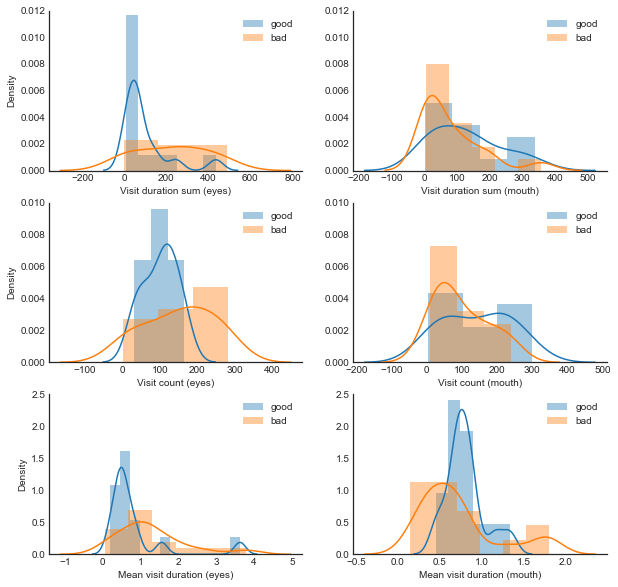

In [44]:
fig, axs = plt.subplots(3,2, figsize=(10,10))
plt.style.use('seaborn-white')

plt.subplot(321)
sns.distplot(visit_good['Visit Duration_All Media_eyes_Sum'], label="good")
sns.distplot(visit_bad['Visit Duration_All Media_eyes_Sum'], label="bad")
plt.legend()
plt.ylabel("Density")
plt.xlabel("Visit duration sum (eyes)")
plt.ylim(0.000,0.012)
sns.despine(left=False, bottom=False)


plt.subplot(322)
sns.distplot(visit_good['Visit Duration_All Media_mouth_Sum'], label="good")
sns.distplot(visit_bad['Visit Duration_All Media_mouth_Sum'], label="bad")
plt.legend()
plt.xlabel("Visit duration sum (mouth)")
plt.ylim(0.000,0.012)
sns.despine(left=False, bottom=False)

plt.subplot(323)
sns.distplot(visit_good['Visit Duration_All Media_eyes_N'], label="good")
sns.distplot(visit_bad['Visit Duration_All Media_eyes_N'], label="bad")
plt.legend()
plt.ylabel("Density")
plt.xlabel("Visit count (eyes)")
plt.ylim(0.000,0.010)
sns.despine(left=False, bottom=False)

plt.subplot(324)
sns.distplot(visit_good['Visit Duration_All Media_mouth_N'], label="good")
sns.distplot(visit_bad['Visit Duration_All Media_mouth_N'], label="bad")
plt.legend()
plt.xlabel("Visit count (mouth)")
plt.ylim(0.000,0.010)
sns.despine(left=False, bottom=False)

plt.subplot(325)
sns.distplot(visit_good['Visit Duration_All Media_eyes_Mean'], label="good")
sns.distplot(visit_bad['Visit Duration_All Media_eyes_Mean'], label="bad")
plt.legend()
plt.ylabel("Density")
plt.xlabel("Mean visit duration (eyes)")
plt.ylim(0,2.5)
sns.despine(left=False, bottom=False)

plt.subplot(326)
sns.distplot(visit_good['Visit Duration_All Media_mouth_Mean'], label="good")
sns.distplot(visit_bad['Visit Duration_All Media_mouth_Mean'], label="bad")
plt.legend()
plt.xlabel("Mean visit duration (mouth)")
plt.ylim(0,2.5)
sns.despine(left=False, bottom=False)

plt.show()
# plt.savefig("visit_duration_summary.png", dpi = 300)

In [45]:
# ttest for sunm of visit duration in eyes
print("T-test for sum of visit duration in eyes")
print(ttest_ind(visit_good['Visit Duration_All Media_eyes_Sum'], visit_bad['Visit Duration_All Media_eyes_Sum']))
print("")
print("T-test for sum of visit duration in mouth")
print(ttest_ind(visit_good['Visit Duration_All Media_mouth_Sum'], visit_bad['Visit Duration_All Media_mouth_Sum']))
print("")
print("T-test for count of visits in eyes")
print(ttest_ind(visit_good['Visit Duration_All Media_eyes_N'], visit_bad['Visit Duration_All Media_eyes_N']))
print("")
print("T-test for count of visits in mouth")
print(ttest_ind(visit_good['Visit Duration_All Media_mouth_N'], visit_bad['Visit Duration_All Media_mouth_N']))
print("")
print("T-test for mean visit duration in eyes")
print(ttest_ind(visit_good['Visit Duration_All Media_eyes_Mean'], visit_bad['Visit Duration_All Media_eyes_Mean']))
print("")
print("T-test for mean visit duration in mouth")
print(ttest_ind(visit_good['Visit Duration_All Media_mouth_Mean'], visit_bad['Visit Duration_All Media_mouth_Mean']))


T-test for sum of visit duration in eyes
Ttest_indResult(statistic=-2.3960766334452797, pvalue=0.023496127608043423)

T-test for sum of visit duration in mouth
Ttest_indResult(statistic=1.217988293457559, pvalue=0.23339290156315418)

T-test for count of visits in eyes
Ttest_indResult(statistic=-1.8843039602054168, pvalue=0.06994504466268131)

T-test for count of visits in mouth
Ttest_indResult(statistic=1.417754541742865, pvalue=0.16729580405743572)

T-test for mean visit duration in eyes
Ttest_indResult(statistic=-1.387104754436868, pvalue=0.1763533795840494)

T-test for mean visit duration in mouth
Ttest_indResult(statistic=0.5466568978693278, pvalue=0.5889447751886835)


## Fixation media

In [46]:
fixation_media = pd.read_csv("fixation-duration-media.txt",sep='\t',na_values='-')

In [47]:
fixation_media = fixation_media.drop([0,1,32]).reset_index(drop=True)
fixation_media = fixation_media.fillna(fixation_media.mean())
fixation_media = fixation_media.rename(columns={"Unnamed: 0":"Participant"})
# fixation_media = fixation_media.drop(30)

In [48]:
fixation_media = fixation_media.set_index('Participant')
fixation_media.to_pickle("fixation_media.pkl")

In [49]:
mute = fixation_media[fixation_media.columns[0:64]]
audio = fixation_media[fixation_media.columns[64:]]

In [50]:
mute.head()

,Fixation Duration_m_WF002_1PT.avi_eye_N,Fixation Duration_m_WF002_1PT.avi_eye_Mean,Fixation Duration_m_WF002_1PT.avi_eye_Sum,Fixation Duration_m_WF002_1PT.avi_eye_Stdev,Fixation Duration_m_WF002_1PT.avi_mouth_N,Fixation Duration_m_WF002_1PT.avi_mouth_Mean,Fixation Duration_m_WF002_1PT.avi_mouth_Sum,Fixation Duration_m_WF002_1PT.avi_mouth_Stdev,Fixation Duration_m_WF009_4PL.avi_eye_N,Fixation Duration_m_WF009_4PL.avi_eye_Mean,...,Fixation Duration_m_WF022_4PL.avi_mouth_Sum,Fixation Duration_m_WF022_4PL.avi_mouth_Stdev,Fixation Duration_m_WF024_1PT.avi_eye_N,Fixation Duration_m_WF024_1PT.avi_eye_Mean,Fixation Duration_m_WF024_1PT.avi_eye_Sum,Fixation Duration_m_WF024_1PT.avi_eye_Stdev,Fixation Duration_m_WF024_1PT.avi_mouth_N,Fixation Duration_m_WF024_1PT.avi_mouth_Mean,Fixation Duration_m_WF024_1PT.avi_mouth_Sum,Fixation Duration_m_WF024_1PT.avi_mouth_Stdev
Participant,,,,,,,,,,,,,,,,,,,,,
Mengran,4.0,0.16,0.64,0.12,3.00,0.190,0.5600,0.1400,8.0,0.27,...,2.130000,0.14000,13.0,0.25,3.22,0.24,2.000000,0.170000,0.350000,0.180000
P03,20.0,1.55,30.96,2.04,6.36,0.454,3.2628,0.3915,14.0,1.92,...,9.546296,0.51037,15.0,2.00,29.95,2.14,10.545455,0.482273,5.954091,0.406667
P04,20.0,0.49,9.85,0.35,21.00,0.400,8.3300,0.2300,4.0,0.65,...,9.570000,0.31000,7.0,0.37,2.62,0.20,4.000000,0.270000,1.090000,0.150000
P05,46.0,0.61,28.28,0.29,2.00,1.030,2.0600,0.1700,49.0,0.47,...,2.420000,0.29000,32.0,0.64,20.56,0.50,3.000000,0.450000,1.360000,0.200000
P06,19.0,1.37,25.99,1.84,6.00,0.340,2.0500,0.2100,37.0,0.69,...,8.930000,0.33000,42.0,0.62,26.14,0.41,12.000000,0.380000,4.580000,0.160000


In [51]:
mute['eyes_N']= mute.loc[:,mute.columns.to_series().str.contains('eye_N')].sum(axis=1)
mute['eyes_Sum'] = mute.loc[:,mute.columns.to_series().str.contains('eye_Sum')].sum(axis=1)
mute['eyes_Mean'] = mute['eyes_Sum']/mute['eyes_N']
mute['eyes_Stdev'] = mute.loc[:,mute.columns.to_series().str.contains('eye_Sum')].std(axis=1)

In [52]:
mute['mouth_N']= mute.loc[:,mute.columns.to_series().str.contains('mouth_N')].sum(axis=1)
mute['mouth_Sum'] = mute.loc[:,mute.columns.to_series().str.contains('mouth_Sum')].sum(axis=1)
mute['mouth_Mean'] = mute['mouth_Sum']/mute['mouth_N']
mute['mouth_Stdev'] = mute.loc[:,mute.columns.to_series().str.contains('mouth_Sum')].std(axis=1)

In [53]:
mute.head()

,Fixation Duration_m_WF002_1PT.avi_eye_N,Fixation Duration_m_WF002_1PT.avi_eye_Mean,Fixation Duration_m_WF002_1PT.avi_eye_Sum,Fixation Duration_m_WF002_1PT.avi_eye_Stdev,Fixation Duration_m_WF002_1PT.avi_mouth_N,Fixation Duration_m_WF002_1PT.avi_mouth_Mean,Fixation Duration_m_WF002_1PT.avi_mouth_Sum,Fixation Duration_m_WF002_1PT.avi_mouth_Stdev,Fixation Duration_m_WF009_4PL.avi_eye_N,Fixation Duration_m_WF009_4PL.avi_eye_Mean,...,Fixation Duration_m_WF024_1PT.avi_mouth_Sum,Fixation Duration_m_WF024_1PT.avi_mouth_Stdev,eyes_N,eyes_Sum,eyes_Mean,eyes_Stdev,mouth_N,mouth_Sum,mouth_Mean,mouth_Stdev
Participant,,,,,,,,,,,,,,,,,,,,,
Mengran,4.0,0.16,0.64,0.12,3.00,0.190,0.5600,0.1400,8.0,0.27,...,0.350000,0.180000,55.0,14.45,0.262727,1.184543,28.000000,11.580000,0.413571,3.473575
P03,20.0,1.55,30.96,2.04,6.36,0.454,3.2628,0.3915,14.0,1.92,...,5.954091,0.406667,114.0,256.41,2.249211,3.699755,81.606309,49.862785,0.611016,14.668334
P04,20.0,0.49,9.85,0.35,21.00,0.400,8.3300,0.2300,4.0,0.65,...,1.090000,0.150000,71.0,28.74,0.404789,2.884608,99.000000,60.110000,0.607172,17.913465
P05,46.0,0.61,28.28,0.29,2.00,1.030,2.0600,0.1700,49.0,0.47,...,1.360000,0.200000,342.0,200.36,0.585848,4.101411,31.000000,13.030000,0.420323,3.866695
P06,19.0,1.37,25.99,1.84,6.00,0.340,2.0500,0.2100,37.0,0.69,...,4.580000,0.160000,275.0,196.67,0.715164,3.189545,77.000000,35.560000,0.461818,10.590689


In [54]:
mute_df = mute_df.set_index("Participant")
mute['actual_acc_percent'] = mute_df['actual_acc_percent']
mute['label'] =mute.apply(lambda row: labeling(row), axis=1)

In [55]:
# mute_df

In [56]:
mute.head()

,Fixation Duration_m_WF002_1PT.avi_eye_N,Fixation Duration_m_WF002_1PT.avi_eye_Mean,Fixation Duration_m_WF002_1PT.avi_eye_Sum,Fixation Duration_m_WF002_1PT.avi_eye_Stdev,Fixation Duration_m_WF002_1PT.avi_mouth_N,Fixation Duration_m_WF002_1PT.avi_mouth_Mean,Fixation Duration_m_WF002_1PT.avi_mouth_Sum,Fixation Duration_m_WF002_1PT.avi_mouth_Stdev,Fixation Duration_m_WF009_4PL.avi_eye_N,Fixation Duration_m_WF009_4PL.avi_eye_Mean,...,eyes_N,eyes_Sum,eyes_Mean,eyes_Stdev,mouth_N,mouth_Sum,mouth_Mean,mouth_Stdev,actual_acc_percent,label
Participant,,,,,,,,,,,,,,,,,,,,,
Mengran,4.0,0.16,0.64,0.12,3.00,0.190,0.5600,0.1400,8.0,0.27,...,55.0,14.45,0.262727,1.184543,28.000000,11.580000,0.413571,3.473575,62.5,1
P03,20.0,1.55,30.96,2.04,6.36,0.454,3.2628,0.3915,14.0,1.92,...,114.0,256.41,2.249211,3.699755,81.606309,49.862785,0.611016,14.668334,25.0,0
P04,20.0,0.49,9.85,0.35,21.00,0.400,8.3300,0.2300,4.0,0.65,...,71.0,28.74,0.404789,2.884608,99.000000,60.110000,0.607172,17.913465,62.5,1
P05,46.0,0.61,28.28,0.29,2.00,1.030,2.0600,0.1700,49.0,0.47,...,342.0,200.36,0.585848,4.101411,31.000000,13.030000,0.420323,3.866695,37.5,0
P06,19.0,1.37,25.99,1.84,6.00,0.340,2.0500,0.2100,37.0,0.69,...,275.0,196.67,0.715164,3.189545,77.000000,35.560000,0.461818,10.590689,25.0,0


In [57]:
good_mute = mute[mute.index.isin(good['Participant'])]

In [58]:
good_mute['eyes_N'].sum(), good_mute['mouth_N'].sum()

(1122.851851851852, 1429.1517637917639)

In [59]:
1122.85+1429.15, 1122.85/(1122.85+1429.15), 1429.15/(1122.85+1429.15)

(2552.0, 0.43998824451410656, 0.5600117554858934)

In [60]:
good_mute['eyes_Sum'].sum(), good_mute['mouth_Sum'].sum()

(746.0241666666667, 874.8126449235949)

In [61]:
746.02+874.81, 746.02/(746.02+874.81), 874.81/(746.02+874.81)

(1620.83, 0.46027035531178473, 0.5397296446882153)

In [62]:
bad_mute = mute[mute.index.isin(bad['Participant'])]

In [63]:
bad_mute['eyes_N'].sum(), bad_mute['mouth_N'].sum()

(2759.446998722861, 1019.0375135975136)

In [64]:
2759.45+1019.04, 2759.45/(2759.45+1019.04),1019.04/(2759.45+1019.04)

(3778.49, 0.7303049630937226, 0.2696950369062774)

In [65]:
bad_mute['eyes_Sum'].sum(), bad_mute['mouth_Sum'].sum()

(2009.3257375478925, 621.0708985884486)

In [66]:
2009.33+621.07, 2009.33/(2009.33+621.07), 621.07/(2009.33+621.07)

(2630.4, 0.7638876216545012, 0.2361123783454988)

In [67]:
audio.head()

,Fixation Duration_s_WF005_4PL.avi_eye_N,Fixation Duration_s_WF005_4PL.avi_eye_Mean,Fixation Duration_s_WF005_4PL.avi_eye_Sum,Fixation Duration_s_WF005_4PL.avi_eye_Stdev,Fixation Duration_s_WF005_4PL.avi_mouth_N,Fixation Duration_s_WF005_4PL.avi_mouth_Mean,Fixation Duration_s_WF005_4PL.avi_mouth_Sum,Fixation Duration_s_WF005_4PL.avi_mouth_Stdev,Fixation Duration_s_WF007_4PL.avi_eye_N,Fixation Duration_s_WF007_4PL.avi_eye_Mean,...,Fixation Duration_s_WF023_4PL.avi_mouth_Sum,Fixation Duration_s_WF023_4PL.avi_mouth_Stdev,Fixation Duration_s_WF025_1PT.avi_eye_N,Fixation Duration_s_WF025_1PT.avi_eye_Mean,Fixation Duration_s_WF025_1PT.avi_eye_Sum,Fixation Duration_s_WF025_1PT.avi_eye_Stdev,Fixation Duration_s_WF025_1PT.avi_mouth_N,Fixation Duration_s_WF025_1PT.avi_mouth_Mean,Fixation Duration_s_WF025_1PT.avi_mouth_Sum,Fixation Duration_s_WF025_1PT.avi_mouth_Stdev
Participant,,,,,,,,,,,,,,,,,,,,,
Mengran,13.0,0.36,4.64,0.25,6.00000,0.250000,1.520000,0.1800,9.0,0.48,...,5.780000,0.2300,10.0,0.34,3.38,0.16,1.000000,0.460000,0.460000,0.418421
P03,30.0,1.10,33.12,1.33,10.62963,0.511852,5.583333,0.4572,17.0,1.76,...,11.591923,0.6756,10.0,2.04,20.42,2.39,9.695652,0.432174,5.185652,0.418421
P04,15.0,0.67,10.06,0.28,13.00000,0.630000,8.140000,0.4000,7.0,0.50,...,13.980000,0.4800,7.0,0.42,2.91,0.20,10.000000,0.520000,5.230000,0.430000
P05,65.0,0.37,23.93,0.20,1.00000,0.370000,0.370000,0.4572,39.0,0.88,...,0.260000,0.1100,35.0,0.41,14.29,0.30,9.695652,0.432174,5.185652,0.418421
P06,34.0,0.62,21.08,0.41,7.00000,0.470000,3.310000,0.3800,31.0,0.83,...,14.770000,0.3600,27.0,0.51,13.75,0.26,8.000000,0.170000,1.370000,0.150000


In [68]:
audio['eyes_N']= audio.loc[:,audio.columns.to_series().str.contains('eye_N')].sum(axis=1)
audio['eyes_Sum'] = audio.loc[:,audio.columns.to_series().str.contains('eye_Sum')].sum(axis=1)
audio['eyes_Mean'] = audio['eyes_Sum']/audio['eyes_N']
audio['eyes_Stdev'] = audio.loc[:,audio.columns.to_series().str.contains('eye_Sum')].std(axis=1)

In [69]:
audio['mouth_N']= audio.loc[:,audio.columns.to_series().str.contains('mouth_N')].sum(axis=1)
audio['mouth_Sum'] = audio.loc[:,audio.columns.to_series().str.contains('mouth_Sum')].sum(axis=1)
audio['mouth_Mean'] = audio['mouth_Sum']/audio['mouth_N']
audio['mouth_Stdev'] = audio.loc[:,audio.columns.to_series().str.contains('mouth_Sum')].std(axis=1)

In [70]:
audio_df = audio_df.set_index("Participant")
audio['actual_acc_percent'] = audio_df['actual_acc_percent']
audio['label'] =audio.apply(lambda row: labeling(row), axis=1)

In [71]:
audio.head()

,Fixation Duration_s_WF005_4PL.avi_eye_N,Fixation Duration_s_WF005_4PL.avi_eye_Mean,Fixation Duration_s_WF005_4PL.avi_eye_Sum,Fixation Duration_s_WF005_4PL.avi_eye_Stdev,Fixation Duration_s_WF005_4PL.avi_mouth_N,Fixation Duration_s_WF005_4PL.avi_mouth_Mean,Fixation Duration_s_WF005_4PL.avi_mouth_Sum,Fixation Duration_s_WF005_4PL.avi_mouth_Stdev,Fixation Duration_s_WF007_4PL.avi_eye_N,Fixation Duration_s_WF007_4PL.avi_eye_Mean,...,eyes_N,eyes_Sum,eyes_Mean,eyes_Stdev,mouth_N,mouth_Sum,mouth_Mean,mouth_Stdev,actual_acc_percent,label
Participant,,,,,,,,,,,,,,,,,,,,,
Mengran,13.0,0.36,4.64,0.25,6.00000,0.250000,1.520000,0.1800,9.0,0.48,...,70.000000,25.120000,0.358857,2.271004,54.000000,20.290000,0.375741,6.206753,50.0,1
P03,30.0,1.10,33.12,1.33,10.62963,0.511852,5.583333,0.4572,17.0,1.76,...,146.000000,220.440000,1.509863,4.518508,101.231582,58.610545,0.578975,17.233067,50.0,1
P04,15.0,0.67,10.06,0.28,13.00000,0.630000,8.140000,0.4000,7.0,0.50,...,76.590909,42.599091,0.556190,3.850751,106.000000,70.050000,0.660849,20.806093,37.5,0
P05,65.0,0.37,23.93,0.20,1.00000,0.370000,0.370000,0.4572,39.0,0.88,...,330.000000,197.670000,0.599000,6.061566,54.112721,29.606473,0.547126,9.214818,37.5,0
P06,34.0,0.62,21.08,0.41,7.00000,0.470000,3.310000,0.3800,31.0,0.83,...,246.000000,154.410000,0.627683,3.755668,94.000000,50.750000,0.539894,15.442084,50.0,1


In [72]:
good_audio = audio[audio.index.isin(good['Participant'])]

In [73]:
bad_audio = audio[audio.index.isin(bad['Participant'])]

In [74]:
fixation_summary['Fixation Duration_All Media_eyes_Sum'].sum()

4701.040000000001

In [75]:
audio['eyes_Sum'].sum()+ mute['eyes_Sum'].sum()

5128.540120750897

In [76]:
sum([good_audio['eyes_Sum'].sum(),good_mute['eyes_Sum'].sum(),bad_audio['eyes_Sum'].sum(),bad_mute['eyes_Sum'].sum()])

5128.540120750897

In [77]:
good_audio['eyes_N'].sum(),good_audio['mouth_N'].sum()

(1048.9792707292709, 1738.9573343242907)

In [78]:
1048.98+1738.96,1048.98/(1048.98+1738.96),1738.98/(1048.98+1738.96)

(2787.94, 0.3762563039376744, 0.6237508698178583)

In [79]:
good_audio['eyes_Sum'].sum(), good_audio['mouth_Sum'].sum()

(709.5592121767122, 963.3368155580331)

In [80]:
709.56+963.34, 709.56/(709.56+963.34), 963.34/(709.56+963.34)

(1672.9, 0.42414968019606664, 0.5758503198039333)

In [81]:
bad_audio['eyes_Sum'].sum(), bad_audio['mouth_Sum'].sum()

(1663.631004359625, 794.9795240926545)

In [82]:
1663.63+794.98, 1663.63/(1663.63+794.98),794.98/(1663.63+794.98)

(2458.61, 0.6766546951326156, 0.3233453048673844)

In [83]:
bad_audio['eyes_N'].sum(), bad_audio['mouth_N'].sum()

(2529.746959936615, 1297.9901201535986)

In [84]:
2529.75+1297.99, 2529.75/(2529.75+1297.99), 1297.99/(2529.75+1297.99)

(3827.74, 0.6608991206299278, 0.33910087937007216)

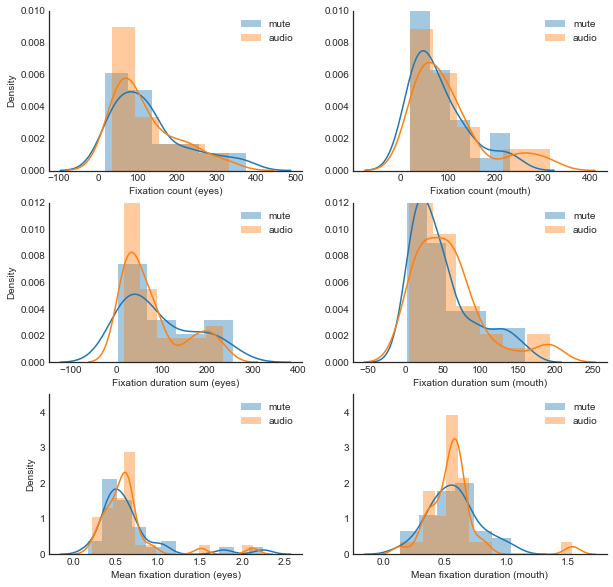

In [85]:
fig, axs =  plt.subplots(3,2, figsize=(10,10))

plt.subplot(321)
sns.distplot(mute['eyes_N'],label='mute')
sns.distplot(audio['eyes_N'],label='audio')
plt.ylabel('Density')
plt.xlabel('Fixation count (eyes)')
plt.legend()
plt.ylim(0,0.010)
sns.despine(left=False, bottom=False)

plt.subplot(322)
sns.distplot(mute['mouth_N'],label='mute')
sns.distplot(audio['mouth_N'],label='audio')
# plt.ylabel('Density')
plt.xlabel('Fixation count (mouth)')
plt.legend()
plt.ylim(0,0.010)
sns.despine(left=False, bottom=False)

plt.subplot(323)
sns.distplot(mute['eyes_Sum'],label='mute')
sns.distplot(audio['eyes_Sum'],label='audio')
plt.ylabel('Density')
plt.xlabel('Fixation duration sum (eyes)')
plt.legend()
plt.ylim(0,0.012)
sns.despine(left=False, bottom=False)

plt.subplot(324)
sns.distplot(mute['mouth_Sum'],label='mute')
sns.distplot(audio['mouth_Sum'],label='audio')
# plt.ylabel('Density')
plt.xlabel('Fixation duration sum (mouth)')
plt.legend()
plt.ylim(0,0.012)
sns.despine(left=False, bottom=False)

plt.subplot(325)
sns.distplot(mute['eyes_Mean'],label='mute')
sns.distplot(audio['eyes_Mean'],label='audio')
plt.ylabel('Density')
plt.xlabel('Mean fixation duration (eyes)')
plt.legend()
plt.ylim(0,4.5)
sns.despine(left=False, bottom=False)

plt.subplot(326)
sns.distplot(mute['mouth_Mean'],label='mute')
sns.distplot(audio['mouth_Mean'],label='audio')
# plt.ylabel('Density')
plt.xlabel('Mean fixation duration (mouth)')
plt.legend()
plt.ylim(0,4.5)
sns.despine(left=False, bottom=False)

plt.show()
# plt.savefig("audio_mute_fixation_comparison.png", dpi=300)

In [86]:
print("T-test for count of fixations in eyes")
print(ttest_rel(mute['eyes_N'],audio['eyes_N']))
print("")
print("T-test for count of fixations in mouth")
print(ttest_rel(mute['mouth_N'],audio['mouth_N']))
print("")
print("T-test for sum of fixation duration in eyes")
print(ttest_rel(mute['eyes_Sum'],audio['eyes_Sum']))
print("")
print("T-test for sum of fixation duration in mouth")
print(ttest_rel(mute['mouth_Sum'],audio['mouth_Sum']))
print("")
print("T-test for mean fixation duration in eyes")
print(ttest_rel(mute['eyes_Mean'],audio['eyes_Mean']))
print("")
print("T-test for mean fixation duration in mouth")
print(ttest_rel(mute['mouth_Mean'],audio['mouth_Mean']))


T-test for count of fixations in eyes
Ttest_relResult(statistic=1.3900896867601942, pvalue=0.1750802532413227)

T-test for count of fixations in mouth
Ttest_relResult(statistic=-3.4012158587716277, pvalue=0.0019742408065454536)

T-test for sum of fixation duration in eyes
Ttest_relResult(statistic=2.003365189644384, pvalue=0.05456157083130026)

T-test for sum of fixation duration in mouth
Ttest_relResult(statistic=-2.1575232642218167, pvalue=0.03938528949150675)

T-test for mean fixation duration in eyes
Ttest_relResult(statistic=0.5532081000433857, pvalue=0.5843609254007973)

T-test for mean fixation duration in mouth
Ttest_relResult(statistic=0.19787447297649763, pvalue=0.8445237956877422)


In [87]:
mute['eyes_Sum'], audio['eyes_Sum']

(Participant
 Mengran     14.450000
 P03        256.410000
 P04         28.740000
 P05        200.360000
 P06        196.670000
 P07         91.844997
 P08         36.253704
 P09        148.740000
 P10         27.650000
 P11         90.300000
 P12         13.020000
 P13        208.692593
 P14         11.920000
 P15         32.420000
 P16         73.060000
 P17          7.790000
 P18         51.324074
 P19         79.500000
 P20         15.167500
 P21         22.427037
 P23        178.760000
 P24         79.050000
 P25        134.250000
 P26        140.110000
 P27          3.320000
 P28         49.420000
 P29        239.970000
 P30         75.500000
 P31        212.200000
 Ting-Yu     36.030000
 Name: eyes_Sum, dtype: float64, Participant
 Mengran     25.120000
 P03        220.440000
 P04         42.599091
 P05        197.670000
 P06        154.410000
 P07         66.778126
 P08         21.444508
 P09         90.570000
 P10         31.439091
 P11         74.730000
 P12         20.195417

## Visit media

In [88]:
visit_media = pd.read_csv("visit-duration-media.txt",sep='\t',na_values='-')

In [89]:
visit_media = visit_media.drop([0,1,32]).reset_index(drop=True)
visit_media = visit_media.fillna(visit_media.mean())
visit_media = visit_media.rename(columns={"Unnamed: 0":"Participant"})
# visit_media = visit_media.drop(30)

In [90]:
visit_media = visit_media.set_index('Participant')

In [91]:
# visit_media

In [92]:
mute_visit = visit_media[visit_media.columns[0:64]]
audio_visit = visit_media[visit_media.columns[64:]]

In [93]:
mute_visit['eyes_N']= mute_visit.loc[:,mute_visit.columns.to_series().str.contains('eye_N')].sum(axis=1)
mute_visit['eyes_Sum'] = mute_visit.loc[:,mute_visit.columns.to_series().str.contains('eye_Sum')].sum(axis=1)
mute_visit['eyes_Mean'] = mute_visit['eyes_Sum']/mute_visit['eyes_N']
mute_visit['eyes_Stdev'] = mute_visit.loc[:,mute_visit.columns.to_series().str.contains('eye_Sum')].std(axis=1)

In [94]:
mute_visit['mouth_N']= mute_visit.loc[:,mute_visit.columns.to_series().str.contains('mouth_N')].sum(axis=1)
mute_visit['mouth_Sum'] = mute_visit.loc[:,mute_visit.columns.to_series().str.contains('mouth_Sum')].sum(axis=1)
mute_visit['mouth_Mean'] = mute_visit['mouth_Sum']/mute_visit['mouth_N']
mute_visit['mouth_Stdev'] = mute_visit.loc[:,mute_visit.columns.to_series().str.contains('mouth_Sum')].std(axis=1)

In [95]:
# mute_df = mute_df.set_index("Participant")
mute_visit['actual_acc_percent'] = mute_df['actual_acc_percent']
mute_visit['label'] =mute_visit.apply(lambda row: labeling(row), axis=1)

In [96]:
audio_visit['eyes_N']= audio_visit.loc[:,audio_visit.columns.to_series().str.contains('eye_N')].sum(axis=1)
audio_visit['eyes_Sum'] = audio_visit.loc[:,audio_visit.columns.to_series().str.contains('eye_Sum')].sum(axis=1)
audio_visit['eyes_Mean'] = audio_visit['eyes_Sum']/audio_visit['eyes_N']
audio_visit['eyes_Stdev'] = audio_visit.loc[:,audio_visit.columns.to_series().str.contains('eye_Sum')].std(axis=1)

In [97]:
audio_visit['mouth_N']= audio_visit.loc[:,audio_visit.columns.to_series().str.contains('mouth_N')].sum(axis=1)
audio_visit['mouth_Sum'] = audio_visit.loc[:,audio_visit.columns.to_series().str.contains('mouth_Sum')].sum(axis=1)
audio_visit['mouth_Mean'] = audio_visit['mouth_Sum']/audio_visit['mouth_N']
audio_visit['mouth_Stdev'] = audio_visit.loc[:,audio_visit.columns.to_series().str.contains('mouth_Sum')].std(axis=1)

In [98]:
# audio_df = audio_df.set_index("Participant")
audio_visit['actual_acc_percent'] = audio_df['actual_acc_percent']
audio_visit['label'] =audio_visit.apply(lambda row: labeling(row), axis=1)

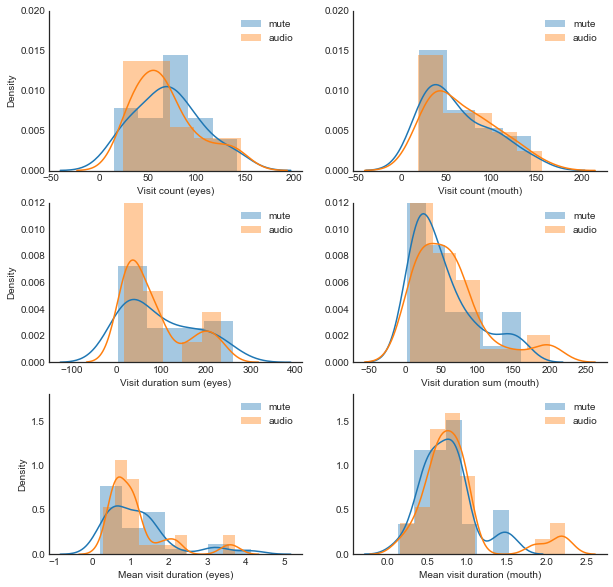

In [99]:
fig, axs =  plt.subplots(3,2, figsize=(10,10))

plt.subplot(321)
sns.distplot(mute_visit['eyes_N'],label='mute')
sns.distplot(audio_visit['eyes_N'],label='audio')
plt.ylabel('Density')
plt.xlabel('Visit count (eyes)')
plt.legend()
plt.ylim(0,0.020)
sns.despine(left=False, bottom=False)

plt.subplot(322)
sns.distplot(mute_visit['mouth_N'],label='mute')
sns.distplot(audio_visit['mouth_N'],label='audio')
# plt.ylabel('Density')
plt.xlabel('Visit count (mouth)')
plt.legend()
plt.ylim(0,0.020)
sns.despine(left=False, bottom=False)

plt.subplot(323)
sns.distplot(mute_visit['eyes_Sum'],label='mute')
sns.distplot(audio_visit['eyes_Sum'],label='audio')
plt.ylabel('Density')
plt.xlabel('Visit duration sum (eyes)')
plt.legend()
plt.ylim(0,0.012)
sns.despine(left=False, bottom=False)

plt.subplot(324)
sns.distplot(mute_visit['mouth_Sum'],label='mute')
sns.distplot(audio_visit['mouth_Sum'],label='audio')
# plt.ylabel('Density')
plt.xlabel('Visit duration sum (mouth)')
plt.legend()
plt.ylim(0,0.012)
sns.despine(left=False, bottom=False)

plt.subplot(325)
sns.distplot(mute_visit['eyes_Mean'],label='mute')
sns.distplot(audio_visit['eyes_Mean'],label='audio')
plt.ylabel('Density')
plt.xlabel('Mean visit duration (eyes)')
plt.legend()
plt.ylim(0,1.8)
sns.despine(left=False, bottom=False)

plt.subplot(326)
sns.distplot(mute_visit['mouth_Mean'],label='mute')
sns.distplot(audio_visit['mouth_Mean'],label='audio')
# plt.ylabel('Density')
plt.xlabel('Mean visit duration (mouth)')
plt.legend()
plt.ylim(0,1.8)
sns.despine(left=False, bottom=False)

plt.show()
# plt.savefig("audio_mute_visit_comparison.png", dpi=300)

In [100]:
print("T-test for count of visits in eyes")
print(ttest_rel(mute_visit['eyes_N'],audio_visit['eyes_N']))
print("")
print("T-test for count of visits in mouth")
print(ttest_rel(mute_visit['mouth_N'],audio_visit['mouth_N']))
print("")
print("T-test for sum of visit duration in eyes")
print(ttest_rel(mute_visit['eyes_Sum'],audio_visit['eyes_Sum']))
print("")
print("T-test for sum of visit duration in mouth")
print(ttest_rel(mute_visit['mouth_Sum'],audio_visit['mouth_Sum']))
print("")
print("T-test for mean visit duration in eyes")
print(ttest_rel(mute_visit['eyes_Mean'],audio_visit['eyes_Mean']))
print("")
print("T-test for mean visit duration in mouth")
print(ttest_rel(mute_visit['mouth_Mean'],audio_visit['mouth_Mean']))


T-test for count of visits in eyes
Ttest_relResult(statistic=0.8805980443974849, pvalue=0.3857752837368871)

T-test for count of visits in mouth
Ttest_relResult(statistic=-1.7698591672528796, pvalue=0.08726552721698001)

T-test for sum of visit duration in eyes
Ttest_relResult(statistic=2.0592318551194753, pvalue=0.048551173636013176)

T-test for sum of visit duration in mouth
Ttest_relResult(statistic=-2.1956389210167937, pvalue=0.036268859016413454)

T-test for mean visit duration in eyes
Ttest_relResult(statistic=0.711764303541242, pvalue=0.4822976628490936)

T-test for mean visit duration in mouth
Ttest_relResult(statistic=-1.5937847345030614, pvalue=0.12182667528194674)


In [101]:
# 6.977591735409199e-11

In [102]:
good_audio_visit = audio_visit[audio_visit.index.isin(good['Participant'])]

In [103]:
bad_audio_visit = audio_visit[audio_visit.index.isin(bad['Participant'])]

In [104]:
good_audio_visit['eyes_Sum'].sum(), good_audio_visit['mouth_Sum'].sum()

(743.811656861657, 1024.639382088443)

In [105]:
good_audio_visit['eyes_N'].sum(), good_audio_visit['mouth_N'].sum()

(737.7474377474379, 1136.0740493001363)

In [106]:
737.75+1136.07, 737.75/(737.75+1136.07), 1136.07/(737.75+1136.07)

(1873.82, 0.39371444429027336, 0.6062855557097266)

In [107]:
bad_audio_visit['eyes_Sum'].sum(), bad_audio_visit['mouth_Sum'].sum()

(1751.5163818620715, 825.9096390932739)

In [108]:
# 1911.93+985.27, 1911.93/(1911.93+985.27), 985.27/(1911.93+985.27)

In [109]:
bad_audio_visit['eyes_N'].sum(), bad_audio_visit['mouth_N'].sum()

(1322.7896496862013, 909.8096370618109)

In [110]:
1322.79+909.81, 1322.79/(1322.79+909.81), 909.81/(1322.79+909.81)

(2232.6, 0.5924885783391561, 0.40751142166084386)

In [111]:
good_mute_visit = mute_visit[mute_visit.index.isin(good['Participant'])]
bad_mute_visit = mute_visit[mute_visit.index.isin(bad['Participant'])]

In [112]:
good_mute_visit['eyes_Sum'].sum(),good_mute_visit['mouth_Sum'].sum()

(762.8175396825396, 923.8712574592075)

In [113]:
good_mute_visit['eyes_N'].sum(),good_mute_visit['mouth_N'].sum()

(792.8783068783068, 1035.7303043253044)

In [114]:
792.88+1035.73,792.88/(792.88+1035.73), 1035.73/(792.88+1035.73)

(1828.6100000000001, 0.43359710381109146, 0.5664028961889085)

In [115]:
bad_mute_visit['eyes_Sum'].sum(), bad_mute_visit['mouth_Sum'].sum()

(2142.189110563766, 639.2283544289045)

In [116]:
bad_mute_visit['eyes_N'].sum(), bad_mute_visit['mouth_N'].sum()

(1341.6701331873746, 838.5214827764828)

In [117]:
1341.67+838.52,1341.67/(1341.67+838.52),838.52/(1341.67+838.52)

(2180.19, 0.6153913191052156, 0.3846086808947844)

In [118]:
visit_media.to_pickle("visit_media.pkl")

In [119]:
1838.15/14

131.29642857142858

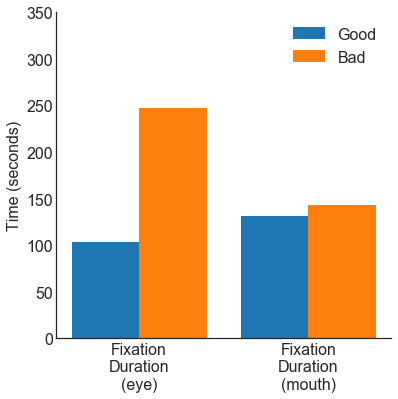

In [120]:

# # fixation duration
plt.figure(figsize=(6,6))
plt.style.use('seaborn-white')
X = np.arange(2)
good_mean = [round(1455.58/14,2),round(1838.15/14,2)]
bad_mean = [round(3961.04/16,2),round(1712.54/12)]
plt.bar(X, good_mean, width=0.4, label="Good")
plt.bar(X+0.4, bad_mean, width=0.4, label='Bad')
sns.despine(left=False, bottom=False)
plt.legend(fontsize=16)
plt.yticks(np.arange(0,380,50),fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.xticks([0.2,1.2],["Fixation\nDuration\n(eye)", "Fixation\nDuration\n(mouth)"],fontsize=16)
plt.savefig("good_bad_fix_dura.png",bbox_inches='tight', dpi = 300)

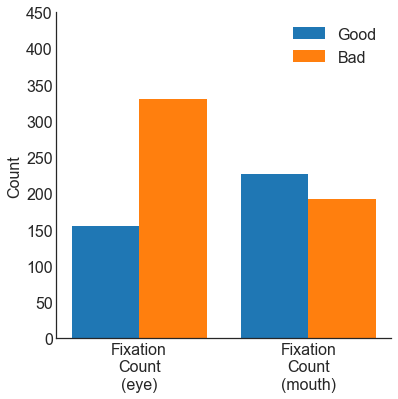

In [121]:
# fixation count
plt.figure(figsize=(6,6))
plt.style.use('seaborn-white')
X = np.arange(2)
good_mean = [round(2171.83/14,2),round(3168.11/14,2)]
bad_mean = [round(5289.2/16,2),round(2317.03/12)]
plt.bar(X, good_mean, width=0.4, label="Good")
plt.bar(X+0.4, bad_mean, width=0.4, label='Bad')
sns.despine(left=False, bottom=False)
plt.legend(fontsize=16)
plt.yticks(np.arange(0,480,50),fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks([0.2,1.2],["Fixation\nCount\n(eye)", "Fixation\nCount\n(mouth)"],fontsize=16)
plt.savefig("good_bad_fix_count.png",bbox_inches='tight', dpi = 300)

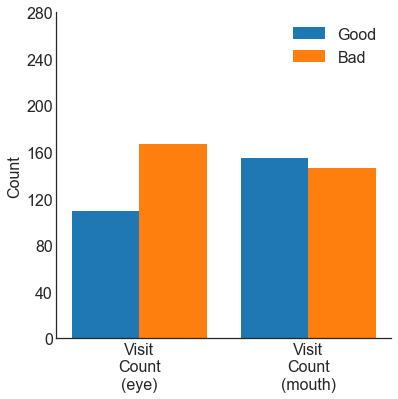

In [122]:
# visit_count
plt.figure(figsize=(6,6))
plt.style.use('seaborn-white')
X = np.arange(2)
good_mean = [round(1530.63/14,2),round(2171.8/14,2)]
bad_mean = [round(2664.46/16,2),round(1748.33/12)]
plt.bar(X, good_mean, width=0.4, label="Good")
plt.bar(X+0.4, bad_mean, width=0.4, label='Bad')
sns.despine(left=False, bottom=False)
plt.legend(fontsize=16)
plt.yticks(np.arange(0,300,40),fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks([0.2,1.2],["Visit\nCount\n(eye)", "Visit\nCount\n(mouth)"],fontsize=16)
plt.savefig("good_bad_visit_count.png",bbox_inches='tight', dpi = 300)

In [123]:
# mean accuray of good group with audio-visual stimuli
audio_df[audio_df.index.isin(good_audio.index)]['actual_acc_percent'].mean()

55.357142857142854

In [124]:
# mean accuracy of 
audio_df[audio_df.index.isin(bad_audio.index)]['actual_acc_percent'].mean()

40.625

In [125]:
mute_df[mute_df.index.isin(good_mute.index)]['actual_acc_percent'].mean()

62.5

In [126]:
mute_df[mute_df.index.isin(bad_mute.index)]['actual_acc_percent'].mean()

33.59375

In [127]:
audio_df

,L1,L2,L3,T4,T5,T6,L7,T8,Gender,actual_acc,actual_acc_percent,label
Participant,,,,,,,,,,,,
Mengran,2,1,1,2,1,1,1,1,Female,4,50.0,audio
P03,2,1,1,2,1,1,1,1,Female,4,50.0,audio
P04,2,1,1,2,1,2,1,1,Female,3,37.5,audio
P05,2,1,1,2,2,2,2,1,Male,3,37.5,audio
P06,2,1,1,2,1,1,2,2,Female,4,50.0,audio
P07,2,1,1,2,2,2,1,2,Male,1,12.5,audio
P08,2,1,1,1,2,2,1,1,Male,3,37.5,audio
P09,2,1,1,1,1,1,2,2,Male,5,62.5,audio
P10,2,1,1,2,1,1,1,1,Male,4,50.0,audio


In [132]:
good_ls = list(good['actual_acc_percent'])

In [133]:
bad_ls = list(bad['actual_acc_percent'])

In [134]:
good_ls

[56.25,
 50.0,
 50.0,
 50.0,
 56.25,
 62.5,
 50.0,
 75.0,
 56.25,
 68.75,
 62.5,
 62.5,
 62.5,
 62.5]

In [135]:
bad_ls

[37.5,
 37.5,
 37.5,
 18.75,
 37.5,
 43.75,
 31.25,
 25.0,
 43.75,
 43.75,
 43.75,
 43.75,
 43.75,
 37.5,
 43.75,
 25.0]

In [136]:
good['actual_acc_percent'].mean(),bad['actual_acc_percent'].mean()

(58.92857142857143, 37.109375)

In [137]:
good

,Participant,Fixation Duration_All Media_eyes_N,Fixation Duration_All Media_eyes_Mean,Fixation Duration_All Media_eyes_Sum,Fixation Duration_All Media_eyes_Stdev,Fixation Duration_All Media_mouth_N,Fixation Duration_All Media_mouth_Mean,Fixation Duration_All Media_mouth_Sum,Fixation Duration_All Media_mouth_Stdev,actual_acc_percent,label
0,Mengran,125,0.32,39.58,0.30,82.0,0.39,31.87,0.32,56.25,1
2,P04,136,0.46,62.16,0.33,205.0,0.63,130.17,0.68,50.00,1
7,P09,361,0.66,239.33,0.65,117.0,0.56,65.41,0.76,50.00,1
8,P10,105,0.48,49.92,0.39,67.0,0.69,46.21,0.54,50.00,1
10,P12,63,0.38,24.19,0.34,223.0,0.65,144.29,0.52,56.25,1
11,P13,211,2.05,432.46,2.36,18.0,0.57,10.30,0.60,62.50,1
12,P14,38,0.36,13.83,0.30,547.0,0.59,321.09,0.52,50.00,1
13,P15,134,0.42,56.09,0.44,4.0,0.45,1.82,0.86,75.00,1
16,P18,135,0.44,59.93,0.42,246.0,0.73,178.45,0.83,56.25,1
18,P20,48,0.21,10.19,0.16,286.0,0.40,114.01,0.47,68.75,1
